#Análise de perfil de ausentes no ENEM 2019

O Enem avalia o desempenho escolar dos estudantes ao término da educação básica. Desde 2014, é uma das principais portas de entrada para a educação superior no Brasil, por meio do Sistema de Seleção Unificada (Sisu).

Segundo o presidente do INEP, no período pré pandemia Covid-19, era esperado uma porcentagem entre 22 e 27% de ausentes. Já durante os anos de 2020 e 2021, a ausência aumentou muito, chegando a 51,5%.  

Gostaríamos de analisar os dados dos candidatos que se ausentam da prova e, se possível, traçar algum perfil que pudesse ser útil para entender melhor como e porque isso ocorre. 

Devido às disparidades de ausências no período da pandemia, escolhemos neste momento trabalhar com os dados de 2019, na expectativa que as porcentagens de ausência se reequilibrem no futuro. 

##Seleção de dados e variáveis

Nessa etapa, excluímos as pessoas que se inscreveram como treineiros.

Também selecionamos apenas as colunas que utilizaremos pra a análise dos perfis.
A intenção é diminuir os gastos com recursos e agilizar as análises.

Em seguida, construímos uma nova coluna, onde definimos os ausentes, eliminados e presentes conforme a seguir:

ausência = 0,
presença = 1,
eliminação = 2 

Sendo ausência, referente a ausência em pelo menos uma das provas, eliminação, referente a eliminação em pelo menos uma das provas e presença, referente a presença em TODAS as provas.

Iniciaremos as análises a partir desse conjunto de dados já trabalhado, conforme código abaixo.

```
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
enem2019 = pd.read_csv('/content/drive/My Drive/MICRODADOS_ENEM_2019.csv', encoding='latin-1', sep=';')

df = enem2019[enem2019['IN_TREINEIRO'] == 0]

presenca = df[(df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1)]
eliminado = df[(df['TP_PRESENCA_CN'] == 2) | (df['TP_PRESENCA_CH'] == 2) | (df['TP_PRESENCA_LC'] == 2) | (df['TP_PRESENCA_MT'] == 2)]
ausencia = df[(df['TP_PRESENCA_CN'] == 0) | (df['TP_PRESENCA_CH'] == 0) | (df['TP_PRESENCA_LC'] == 0) | (df['TP_PRESENCA_MT'] == 0)]

presenca['presenca'] = 1
eliminado['presenca'] = 2
ausencia['presenca'] = 0

novo = pd.concat([presenca, eliminado, ausencia])
df_ordenado = novo.sort_index()

df_ordenado = df_ordenado[['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',  'TP_ESTADO_CIVIL', 
         'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 
         'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 
         'CO_MUNICIPIO_ESC', 'SG_UF_ESC', 'CO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 
         'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
         'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
         'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'presenca']]

df_ordenado.to_csv('MICRODADOS_ENEM_2019_filtrado2.csv', encoding='latin-1', sep=';')
```



##Análise Descritiva dos perfis de ausentes e presentes

Iniciaremos aqui a análise descritiva dos inscrito, ausentes e presentes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/MICRODADOS_ENEM_2019_filtrado2.csv', encoding='latin-1', sep=';')

In [ ]:
df.head()

,Unnamed: 0,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,presenca
0,0,190001595656,13,M,1,3,1,1,11,1,...,A,A,A,A,A,C,A,C,B,0
1,1,190001421546,8,M,1,1,1,1,5,1,...,A,A,B,A,A,E,A,A,B,0
2,2,190001133210,13,F,1,3,1,1,13,1,...,A,A,B,A,A,C,A,A,B,0
3,3,190001199383,10,F,1,1,1,1,4,1,...,A,A,C,A,B,D,A,B,B,1
4,4,190001237802,7,F,1,1,1,1,4,1,...,A,A,B,A,A,C,B,B,B,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'CO_MUNICIPIO_ESC',
       'SG_UF_ESC', 'CO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'Q001', 'Q002',
       'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011',
       'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
       'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'presenca'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
presentes = df[df['presenca']==1]
ausentes = df[df['presenca']==0]
eliminados = df[df['presenca']==2]

Após importação dos dados, iniaremos as análises, por variável, comparando a porcentagem de ausentes com a porcentagem de inscritos, a fim de verificar se há diferença nas distribuição de ausentes e inscritos. 

Aqui, df é o dataframe com o total de inscritos e ausentes é o dataframe com o total de ausentes. 

Nos gráficos, em azul estão os inscritos e em laranja os ausentes.

####Faixa Etaria

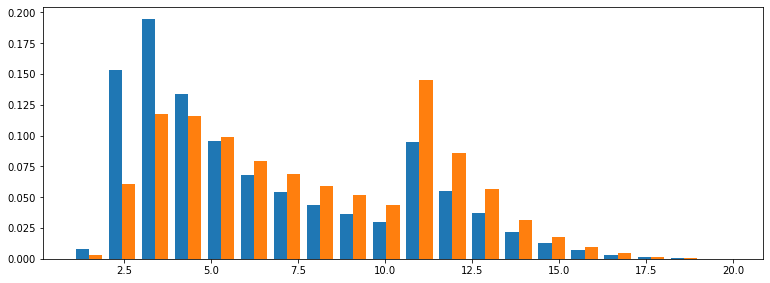

In [ ]:
data = [df['TP_FAIXA_ETARIA'], ausentes['TP_FAIXA_ETARIA']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
bp = ax.hist(data, bins=20, density = True)
plt.show()

In [ ]:
df['TP_FAIXA_ETARIA'].value_counts(normalize=True)[:5]

3     0.185002
2     0.145631
4     0.126704
5     0.090714
11    0.089852
Name: TP_FAIXA_ETARIA, dtype: float64

In [ ]:
ausentes['TP_FAIXA_ETARIA'].value_counts(normalize=True)[:5]

11    0.137916
3     0.111523
4     0.110105
5     0.094043
12    0.081872
Name: TP_FAIXA_ETARIA, dtype: float64

Através do histograma, temos indício que as distribuições das faixas etárias são diferentes entre o total de inscritos e os ausentes. Portanto é uma característica relevante para a análise.

Entre os inscritos, 54,8% estão entre 17 e 20 anos.
Enquanto, entre os ausentes, 31,5% estão entre 18 e 20 anos e 22% estão entre 26 e 35 anos.

####Sexo

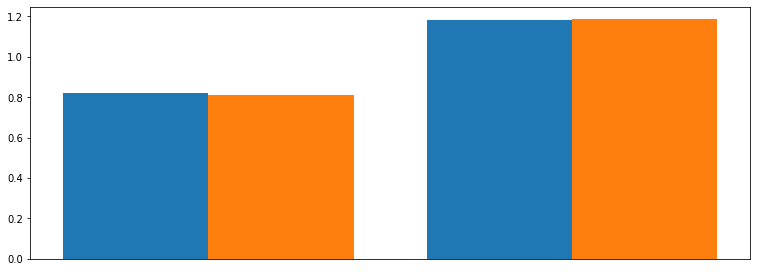

In [ ]:
data = [df['TP_SEXO'], ausentes['TP_SEXO']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
bp = ax.hist(data, bins=2, density = True)
plt.show()

In [ ]:
df['TP_SEXO'].value_counts(normalize=True)[:5]

F    0.590463
M    0.409537
Name: TP_SEXO, dtype: float64

In [ ]:
ausentes['TP_SEXO'].value_counts(normalize=True)[:5]

F    0.593962
M    0.406038
Name: TP_SEXO, dtype: float64

Pelas propoções, temos indício que as distribuições dos sexos não são diferentes entre o total de inscritos e os ausentes. Portanto não é uma característica relevante para a análise.

Entre os inscritos, 59,04% são do sexo feminino. Enquanto, entre os ausentes, 59,39% são do sexo feminino.

####Estado Civil

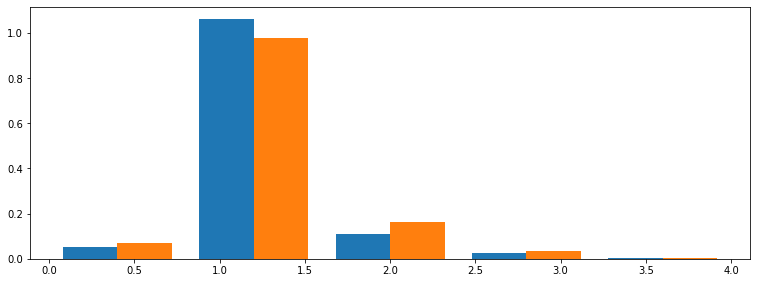

In [ ]:
data = [df['TP_ESTADO_CIVIL'], ausentes['TP_ESTADO_CIVIL']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
bp = ax.hist(data, bins=5, density = True)
plt.show()

In [ ]:
df['TP_ESTADO_CIVIL'].value_counts(normalize=True)[:5]

1    0.850259
2    0.087617
0    0.041858
3    0.018903
4    0.001363
Name: TP_ESTADO_CIVIL, dtype: float64

In [ ]:
ausentes['TP_ESTADO_CIVIL'].value_counts(normalize=True)[:5]

1    0.782741
2    0.131522
0    0.056751
3    0.027104
4    0.001881
Name: TP_ESTADO_CIVIL, dtype: float64

Há indícios de que os solteiros se ausentam menos do que os casados ou divorciados. 

Enquanto 85% dos inscritos são solteiros e 10,% são casados ou divorciados,  apenas 78% dos ausentes são solteiros e 15,9% são casados ou divorciados. 

####Cor Raça

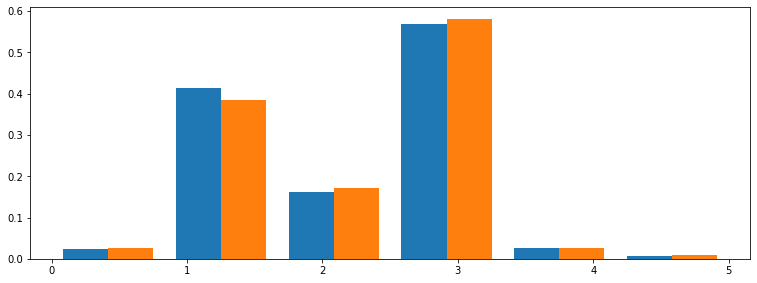

In [ ]:
data = [df['TP_COR_RACA'], ausentes['TP_COR_RACA']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
bp = ax.hist(data, bins=6, density = True)
plt.show()

In [ ]:
df['TP_COR_RACA'].value_counts(normalize=True)[:5]

3    0.472955
1    0.344146
2    0.134041
4    0.022558
0    0.019889
Name: TP_COR_RACA, dtype: float64

In [ ]:
ausentes['TP_COR_RACA'].value_counts(normalize=True)[:5]

3    0.484449
1    0.321455
2    0.143187
4    0.022417
0    0.021117
Name: TP_COR_RACA, dtype: float64

Há uma pequena diferença entre a distribuição das cores dos inscritos e ausentes que precisa ser investigada, para sabermos se há relevância nessa variável ou não. 

Entre os inscritos, 34,4% são brancos e 60,7 são pretos ou pardos.
Entre os ausentes, 32,14% são brancos e 62,7 são pretos ou pardos. 

####Tipo de escola

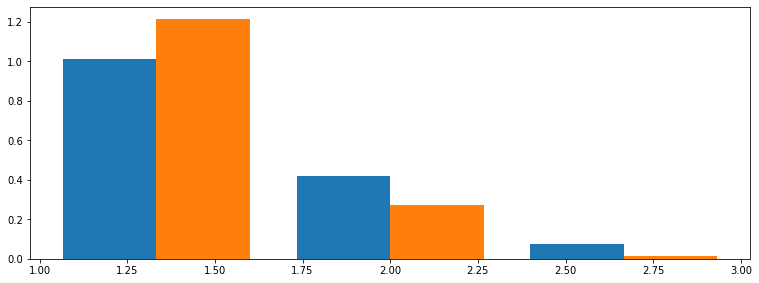

In [ ]:
data = [df['TP_ESCOLA'], ausentes['TP_ESCOLA']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
bp = ax.hist(data, bins=3, density = True)
plt.show()

In [ ]:
df['TP_ESCOLA'].value_counts(normalize=True)[:5]

1    0.672690
2    0.278493
3    0.048817
Name: TP_ESCOLA, dtype: float64

In [ ]:
ausentes['TP_ESCOLA'].value_counts(normalize=True)[:5]

1    0.809891
2    0.181548
3    0.008561
Name: TP_ESCOLA, dtype: float64

In [ ]:
df[df['TP_ESCOLA'] != 1]['TP_ESCOLA'].value_counts(normalize=True)[:5]

2    0.850854
3    0.149146
Name: TP_ESCOLA, dtype: float64

In [ ]:
ausentes[ausentes['TP_ESCOLA'] != 1]['TP_ESCOLA'].value_counts(normalize=True)[:5]

2    0.954968
3    0.045032
Name: TP_ESCOLA, dtype: float64

67% dos inscritos não informaram o tipo de escola e 80% dos ausentes também não. Eliminando essa opção, analisamos apenas os que informaram o tipo de escola.

Entre os inscritos, 85% são de escola pública e 14,9% são de escola particular. Entre os ausentes, 95% são de escola pública e 4,5% são de escola particular.

Pelas propoções, temos indício que as distribuições dos tipos de escola são diferentes entre o total de inscritos e os ausentes. Portanto seria uma característica relevante para a análise. Porém, com uma porcentagem tão alta sem informação é preciso analisar mais.

####UF da escola em que fez a prova

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


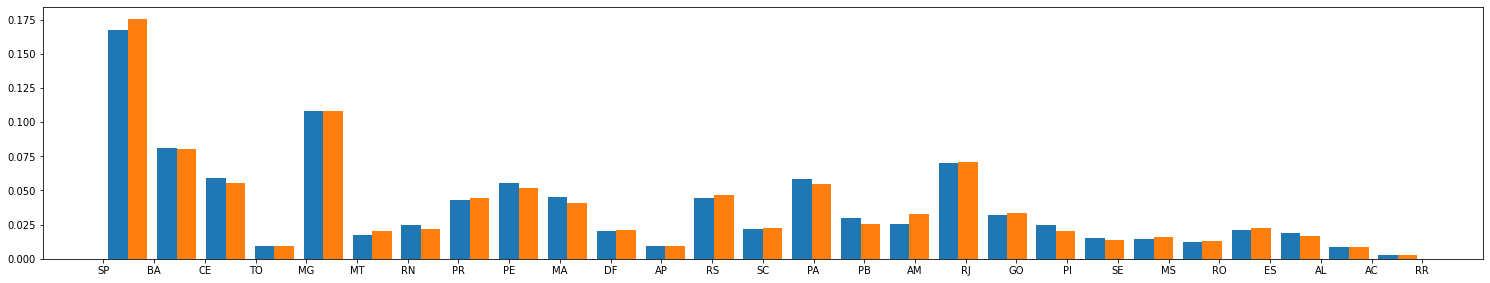

In [ ]:
data = [df['SG_UF_PROVA'], ausentes['SG_UF_PROVA']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 2, 0.5])
bp = ax.hist(data, bins=27, density = True)
plt.show()

In [ ]:
df['SG_UF_PROVA'].value_counts(normalize=True)[:10]

SP    0.161130
MG    0.103915
BA    0.077817
RJ    0.067427
CE    0.056606
PA    0.055893
PE    0.053320
MA    0.043526
RS    0.042971
PR    0.041199
Name: SG_UF_PROVA, dtype: float64

In [ ]:
ausentes['SG_UF_PROVA'].value_counts(normalize=True)[:10]

SP    0.169017
MG    0.103934
BA    0.077120
RJ    0.067990
CE    0.053396
PA    0.052496
PE    0.049587
RS    0.045157
PR    0.042821
MA    0.039602
Name: SG_UF_PROVA, dtype: float64

Pelo histograma, podemos perceber que há alguns estados com uma proporção de ausentes maior que a de inscritos, como SP, MT, PR, DF, RS, SC, AM, RJ, GO, MS, RO e ES. E outros com menor proporção de ausentes que a de inscritos, como BA, CE, RN, PE, MA, PA, PB, PI, SE e AL.

Portanto esta é uma variável relevante para esta análise. 

####Renda

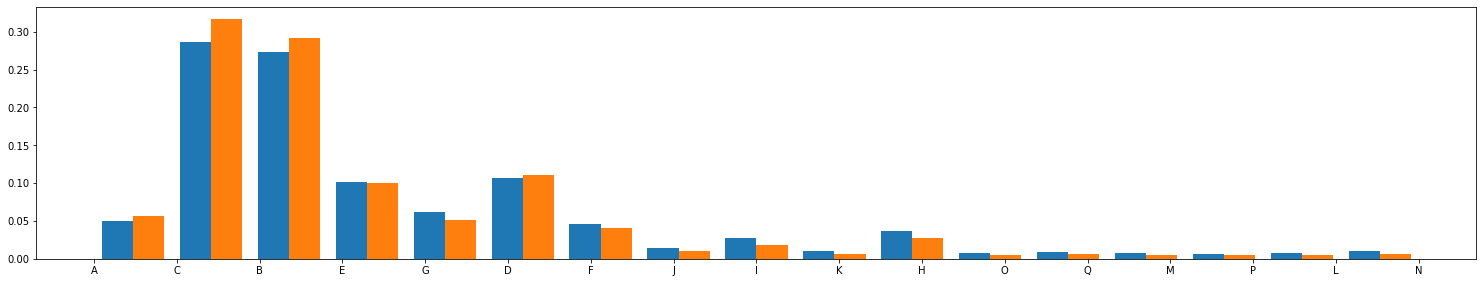

In [ ]:
data = [df['Q006'], ausentes['Q006']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 2, 0.5])
bp = ax.hist(data, bins=17, density = True)
plt.show()

Nesse caso, é possível perceber que, em rendas maiores, a proporção de ausentes é menor. 

####Número de pessoas na casa

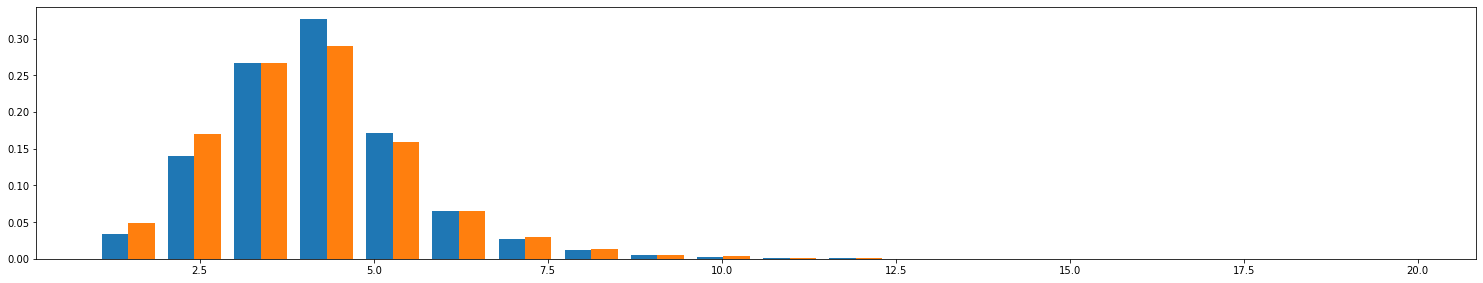

In [ ]:
data = [df['Q005'], ausentes['Q005']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 2, 0.5])
bp = ax.hist(data, bins=20, density = True)
plt.show()

In [ ]:
df['Q005'].value_counts(normalize=True)[:5]

4    0.310692
3    0.253269
5    0.162217
2    0.133573
6    0.061410
Name: Q005, dtype: float64

In [ ]:
ausentes['Q005'].value_counts(normalize=True)[:5]

4    0.275224
3    0.253028
2    0.160991
5    0.151625
6    0.061670
Name: Q005, dtype: float64

Aqui, percebemos que pessoas que moram sozinhas ou com mais 1 pessoa se ausentam mais.

####Internet

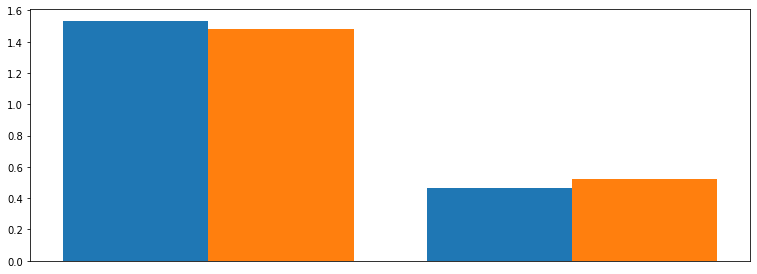

In [ ]:
data = [df['Q025'], ausentes['Q025']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
bp = ax.hist(data, bins=2, density = True)
plt.show()

In [ ]:
df['Q025'].value_counts(normalize=True)[:5]

B    0.766472
A    0.233528
Name: Q025, dtype: float64

In [ ]:
ausentes['Q025'].value_counts(normalize=True)[:5]

B    0.739252
A    0.260748
Name: Q025, dtype: float64

Aqui, temos que pessoas com internet em casa se ausentam menos. 

Entre os inscritos, 76,6% têm acesso à internet em casa e 23% não. Entre os ausentes, 74% têm acesso à internet em casa e 26% não.

##Agrupamento de perfis de ausentes

A partir da análise descritiva das variáveis acima, pretendemos rodar um modelo de agrupamento para tentar encontrar grandes perfis de pessoas que se inscrevem para fazer a prova do ENEM e por algum motivo acabam se ausentando.

In [123]:
import numpy as np

In [140]:
data = df[['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
          'TP_ESCOLA', 'SG_UF_PROVA', 'Q005', 'Q006', 'Q025', 'presenca']]
data = data[data['presenca'] != 2]          

In [141]:
data['TP_FAIXA_ETARIA'] = data.TP_FAIXA_ETARIA.astype('category')
data['TP_ESTADO_CIVIL'] = data.TP_ESTADO_CIVIL.astype('category')
data['TP_COR_RACA'] = data.TP_COR_RACA.astype('category')
data['TP_ESCOLA'] = data.TP_ESCOLA.astype('category')
data['SG_UF_PROVA'], uniques = pd.factorize(data['SG_UF_PROVA'])
data['Q006'], uniques = pd.factorize(data['Q006'])
data['Q025'], uniques = pd.factorize(data['Q025'])

In [142]:
y = data['presenca']
x = data.drop(columns=['presenca', 'NU_INSCRICAO'],axis=1)

####Feature Selection

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
algo = SelectKBest(score_func=f_classif, k=3)
a = algo.fit_transform(x,y)
algo.scores_

array([2.71527471e+05, 1.93433118e+04, 2.11501045e+03, 1.80472010e+05,
       6.49437895e+01, 7.45147626e+03, 3.00822480e+04, 7.57614101e+03])

In [107]:
algo.scores_/sum(algo.scores_)

array([5.23544923e-01, 3.72967517e-02, 4.07805140e-03, 3.47976594e-01,
       1.25221183e-04, 1.43675428e-02, 5.80030011e-02, 1.46079148e-02])

Através da ferramento de Feature Selection do Sklearn, elencamos as principais variáveis que servirão para nosso agrupamento e as respectivas proporções de informação. 

Na ordem:

'TP_FAIXA_ETARIA' (faixa etária) 52,3%,

'TP_ESCOLA' (tipo de escola) 34,8%,

'Q006' (renda) 5,8%,

'TP_ESTADO_CIVIL' (estado civil) 3,7%,

'Q025' (internet em casa) 1,4%,

'Q005' (número de pessoas em casa) 1,4%,

'TP_COR_RACA' (cor/raça) 0,4%,

'SG_UF_PROVA' (UF da realização da prova) 0,0%





####Definição de clusters dos ausentes

In [171]:
data2 = df[['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
          'TP_ESCOLA', 'SG_UF_PROVA', 'Q005', 'Q006', 'Q025', 'presenca']]
data2 = data2[data2['presenca'] == 0]          

In [157]:
dataausentes['TP_FAIXA_ETARIA'] = data2.TP_FAIXA_ETARIA.astype('category')
dataausentes['TP_ESTADO_CIVIL'] = data2.TP_ESTADO_CIVIL.astype('category')
dataausentes['TP_COR_RACA'] = data2.TP_COR_RACA.astype('category')
dataausentes['TP_ESCOLA'] = data2.TP_ESCOLA.astype('category')
dataausentes['SG_UF_PROVA'], uniques = pd.factorize(data2['SG_UF_PROVA'])
dataausentes['Q006'], uniques = pd.factorize(data2['Q006'])
dataausentes['Q025'], uniques = pd.factorize(data2['Q025'])

In [158]:
y = dataausentes['presenca']
x = dataausentes.drop(columns=['presenca', 'NU_INSCRICAO'],axis=1)

In [159]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
xnorm = norm.fit_transform(x)

In [160]:
from sklearn.cluster import KMeans

In [161]:
modelo = KMeans(n_clusters = 3)
modelo.fit(xnorm)

KMeans(n_clusters=3)

In [162]:
clusters = modelo.predict(xnorm)
clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [164]:
dataausentes['clusters'] = clusters

In [166]:
dataausentes.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,SG_UF_PROVA,Q005,Q006,Q025,presenca,clusters
0,190001595656,13,1,3,1,0,2,0,0,0,0
1,190001421546,8,1,1,1,1,4,1,0,0,0
2,190001133210,13,1,3,1,2,2,2,0,0,0
7,190001595657,5,1,3,1,0,2,3,0,0,0
8,190001592264,5,1,1,1,0,6,1,1,0,2


In [173]:
data3 = dataausentes[['NU_INSCRICAO', 'clusters']]

In [177]:
datafim = data2.set_index("NU_INSCRICAO").join(data3.set_index("NU_INSCRICAO"), on="NU_INSCRICAO")

In [180]:
grupo0 = datafim[datafim['clusters']==0]
grupo1 = datafim[datafim['clusters']==1]
grupo2 = datafim[datafim['clusters']==2]

In [186]:
for col in ['TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
          'TP_ESCOLA', 'SG_UF_PROVA', 'Q005', 'Q006', 'Q025']:
    print(grupo0[col].value_counts(normalize=True)[:3])

3     0.137252
4     0.120871
11    0.118868
Name: TP_FAIXA_ETARIA, dtype: float64
1    0.802719
2    0.120452
0    0.050938
Name: TP_ESTADO_CIVIL, dtype: float64
3    0.422892
1    0.385060
2    0.143403
Name: TP_COR_RACA, dtype: float64
1    0.779929
2    0.204267
3    0.015804
Name: TP_ESCOLA, dtype: float64
SP    0.314027
MG    0.183729
BA    0.125365
Name: SG_UF_PROVA, dtype: float64
4    0.292237
3    0.263976
2    0.160463
Name: Q005, dtype: float64
C    0.291982
B    0.199403
D    0.121050
Name: Q006, dtype: float64
B    1.0
Name: Q025, dtype: float64


In [187]:
for col in ['TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
          'TP_ESCOLA', 'SG_UF_PROVA', 'Q005', 'Q006', 'Q025']:
    print(grupo1[col].value_counts(normalize=True)[:3])

11    0.159894
4     0.098353
12    0.098277
Name: TP_FAIXA_ETARIA, dtype: float64
1    0.737552
2    0.164668
0    0.063981
Name: TP_ESTADO_CIVIL, dtype: float64
3    0.495073
1    0.327087
2    0.128207
Name: TP_COR_RACA, dtype: float64
1    0.893030
2    0.103514
3    0.003457
Name: TP_ESCOLA, dtype: float64
RJ    0.163989
RS    0.130307
GO    0.087019
Name: SG_UF_PROVA, dtype: float64
4    0.270875
3    0.261198
2    0.174063
Name: Q005, dtype: float64
C    0.314312
B    0.222986
D    0.117967
Name: Q006, dtype: float64
B    1.0
Name: Q025, dtype: float64


In [188]:
for col in ['TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
          'TP_ESCOLA', 'SG_UF_PROVA', 'Q005', 'Q006', 'Q025']:
    print(grupo2[col].value_counts(normalize=True)[:3])

11    0.147347
4     0.104046
3     0.103523
Name: TP_FAIXA_ETARIA, dtype: float64
1    0.796901
2    0.114869
0    0.059061
Name: TP_ESTADO_CIVIL, dtype: float64
3    0.580550
1    0.204114
2    0.159086
Name: TP_COR_RACA, dtype: float64
1    0.771957
2    0.226602
3    0.001441
Name: TP_ESCOLA, dtype: float64
PA    0.107411
SP    0.099074
MG    0.077318
Name: SG_UF_PROVA, dtype: float64
4    0.250200
3    0.225008
5    0.166419
Name: Q005, dtype: float64
B    0.461385
C    0.292226
A    0.114881
Name: Q006, dtype: float64
A    1.0
Name: Q025, dtype: float64
